In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-05-11 20:35:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  45.4MB/s    in 1.4s    

2021-05-11 20:35:44 (45.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile 
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip = zipfile.ZipFile(local_zip,'r')
zip.extractall('/tmp')
zip.close()

In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
cat_fnames = os.listdir(train_cats_dir)
dog_fnames = os.listdir(train_dogs_dir)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
nrows = 4
ncols = 4

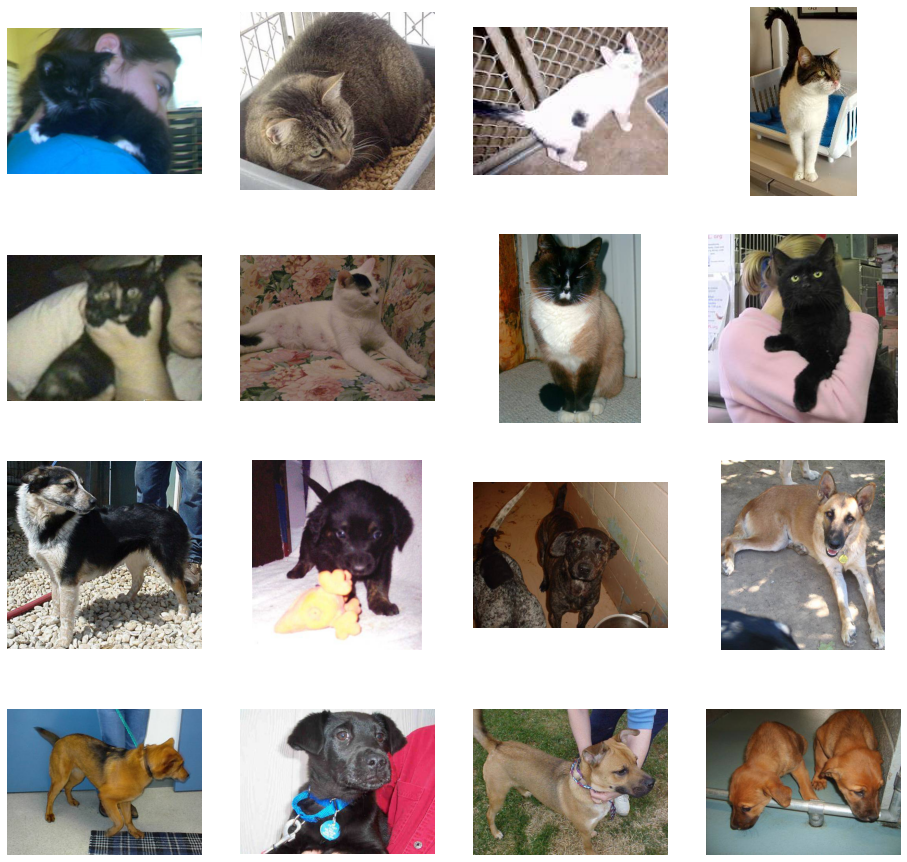

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,ncols*4)
next_cat = [os.path.join(train_cats_dir,fname) for fname in cat_fnames[0:8]]
next_dog = [os.path.join(train_dogs_dir,fname) for fname in dog_fnames[0:8]]
for i,img_path in enumerate(next_cat+next_dog):
  plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = img.imread(img_path)
  plt.imshow(image)
plt.show() 

In [ ]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size =20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs = 15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 57s - loss: 0.7771 - accuracy: 0.5485 - val_loss: 0.7409 - val_accuracy: 0.5030
Epoch 2/15
100/100 - 55s - loss: 0.6445 - accuracy: 0.6465 - val_loss: 0.6051 - val_accuracy: 0.7030
Epoch 3/15
100/100 - 55s - loss: 0.5583 - accuracy: 0.7150 - val_loss: 0.5834 - val_accuracy: 0.7140
Epoch 4/15
100/100 - 55s - loss: 0.4757 - accuracy: 0.7695 - val_loss: 0.6345 - val_accuracy: 0.7060
Epoch 5/15
100/100 - 55s - loss: 0.3942 - accuracy: 0.8205 - val_loss: 0.6015 - val_accuracy: 0.7300
Epoch 6/15
100/100 - 55s - loss: 0.2775 - accuracy: 0.8770 - val_loss: 0.7375 - val_accuracy: 0.7210
Epoch 7/15
100/100 - 56s - loss: 0.2028 - accuracy: 0.9130 - val_loss: 0.8441 - val_accuracy: 0.6920
Epoch 8/15
100/100 - 56s - loss: 0.1311 - accuracy: 0.9505 - val_loss: 0.9432 - val_accuracy: 0.7060
Epoch 9/15
100/100 - 55s - loss: 0.0972 - accuracy: 0.9710 - val_loss: 1.1827 - val_accuracy: 0.7210
Epoch 10/15
100/100 - 55s - loss: 0.0722 - accuracy: 0.9785 - val_loss: 1.1498 - val_accura

In [ ]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  imag = image.load_img(path,target_size=(150,150))
  x = image.img_to_array(imag)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0] > 0:
    print(fn + "is a dog")
  else:
    print(fn + "is a cat")   

Saving VSy6kJDNq2pSXsCzb6cvYF.jpg to VSy6kJDNq2pSXsCzb6cvYF.jpg
[0.]
VSy6kJDNq2pSXsCzb6cvYF.jpgis a cat


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-05-11 20:53:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  30.1MB/s    in 4.7s    

2021-05-11 20:53:10 (30.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os 
import zipfile 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse48-8.png', 'horse24-9.png', 'horse24-3.png', 'horse39-4.png', 'horse06-4.png', 'horse17-1.png', 'horse16-7.png', 'horse46-2.png', 'horse40-2.png', 'horse12-0.png']
['human08-20.png', 'human03-25.png', 'human03-22.png', 'human13-15.png', 'human02-27.png', 'human08-01.png', 'human07-21.png', 'human14-18.png', 'human06-11.png', 'human01-03.png']


In [ ]:
print("total training horse images: ",len(train_horse_names))
print("total traiing human images: ",len(train_human_names))

total training horse images:  500
total traiing human images:  527


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

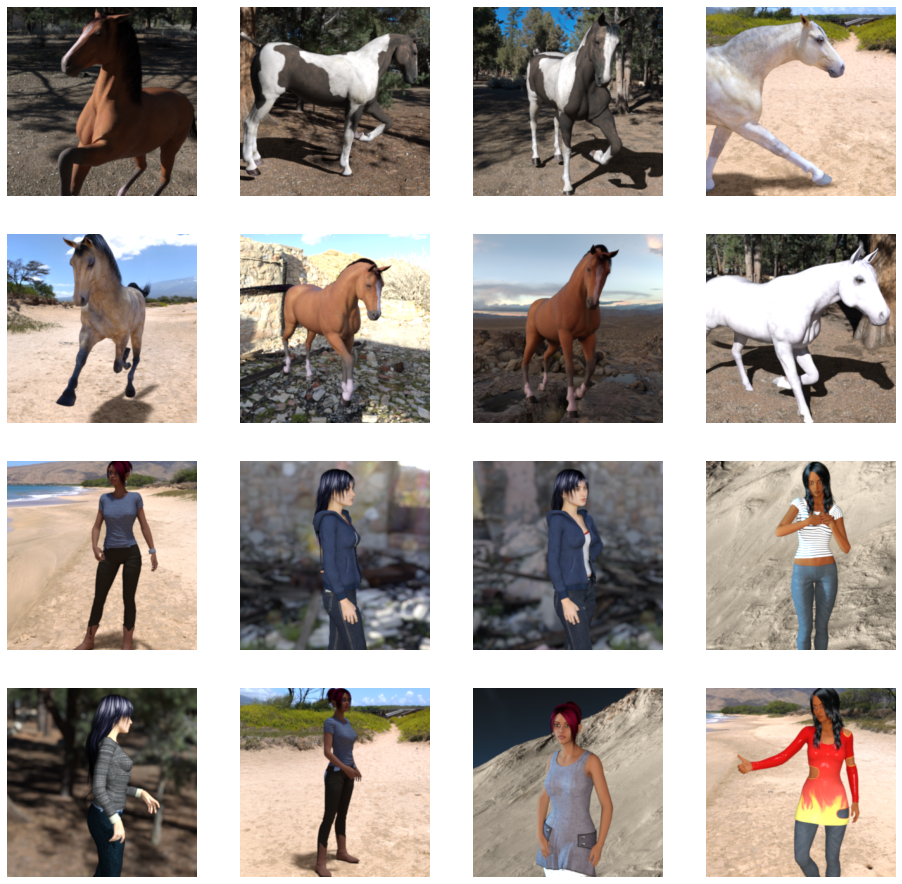

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]
for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()  

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',optimizer = RMSprop(learning_rate=0.001),metrics=['accuracy']) 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size = 128,class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 83s 12s/step - loss: 1.3872 - accuracy: 0.4839
Epoch 2/15
8/8 [==============================] - 73s 9s/step - loss: 0.6543 - accuracy: 0.6202
Epoch 3/15
8/8 [==============================] - 74s 9s/step - loss: 0.9510 - accuracy: 0.6214
Epoch 4/15
8/8 [==============================] - 74s 10s/step - loss: 0.9710 - accuracy: 0.7000
Epoch 5/15
8/8 [==============================] - 74s 10s/step - loss: 0.5451 - accuracy: 0.7879
Epoch 6/15
8/8 [==============================] - 74s 9s/step - loss: 0.3696 - accuracy: 0.8185
Epoch 7/15
8/8 [==============================] - 73s 10s/step - loss: 0.4864 - accuracy: 0.8399
Epoch 8/15
8/8 [==============================] - 73s 10s/step - loss: 0.1318 - accuracy: 0.9575
Epoch 9/15
8/8 [==============================] - 97s 12s/step - loss: 0.0968 - accuracy: 0.9665
Epoch 10/15
8/8 [==============================] - 74s 9s/step - loss: 0.3880 - accuracy: 0.8706
Epoch 11/15
8/8 [================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 3534151613323328682.jpg to 3534151613323328682.jpg
[1.]
3534151613323328682.jpg is a human


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape) 
x /= 255

successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-13 11:25:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.240, 142.250.65.80, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   118MB/s    in 1.6s    

2021-05-13 11:25:42 (118 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-13 11:25:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.164.176, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rp

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-100.png', 'rock04-100.png', 'rock02-016.png', 'rock03-027.png', 'rock06ck02-108.png', 'rock01-041.png', 'rock01-091.png', 'rock06ck02-011.png', 'rock07-k03-048.png', 'rock06ck02-032.png']
['paper06-077.png', 'paper03-113.png', 'paper06-050.png', 'paper06-072.png', 'paper07-036.png', 'paper06-037.png', 'paper07-043.png', 'paper05-079.png', 'paper04-078.png', 'paper07-042.png']
['scissors01-047.png', 'scissors02-042.png', 'scissors03-032.png', 'scissors04-015.png', 'scissors02-080.png', 'testscissors01-089.png', 'testscissors03-009.png', 'testscissors02-114.png', 'testscissors02-058.png', 'scissors03-024.png']


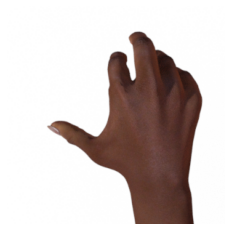

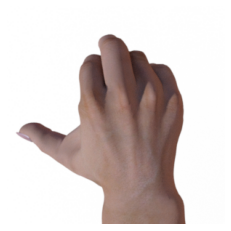

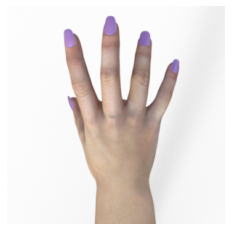

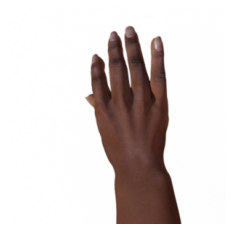

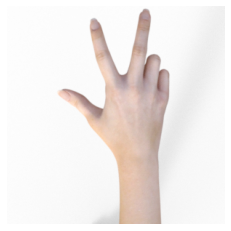

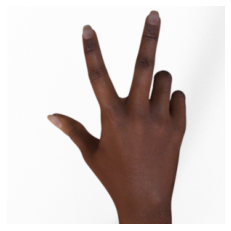

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[0:2]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[0:2]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[0:2]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

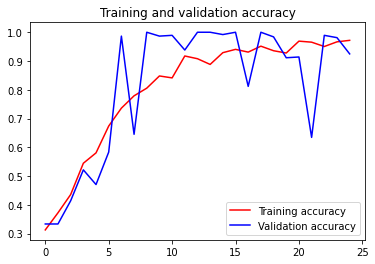

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)